# Practice in Python - Graphs, Visualization, and Dashboards

In this section, we will study data creation and visualization, such as:
- Histograms;
- Density and Scatter Plots;
- Box plots;

Learning with libraries: matplotlib, pandas, numpy, and seaborn.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

____
# Dataset: Trees


In [5]:
dttrees = pd.read_csv('z_trees.csv')
dttrees.head()
#dttrees.shape: checks how many rows and columns are in the dataset (rows, columns).

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [7]:
#Visualizing the data in a histogram with Numpy
dt_hist = np.histogram(dttrees.iloc[:,1],bins=6)
dt_hist

'''Returns a tuple containing two arrays:
    1. The first array is the count of data in each interval.
    2. The second array contains the limits of the intervals.
'''

(array([4, 2, 5, 7, 9, 4], dtype=int64),
 array([63., 67., 71., 75., 79., 83., 87.]))

Text(0.5, 0, 'Height')

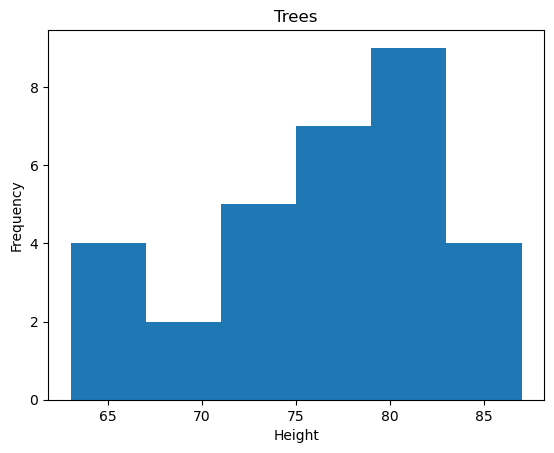

In [6]:
#Visualizing the data in a histogram with matplotlib
plt.hist(dttrees.iloc[:,1], bins=6) #bins=6 divide the data into 6 intervals to construct the histogram.
plt.title('Trees')
plt.ylabel('Frequency')
plt.xlabel('Height')

[Text(0.5, 1.0, 'Trees')]

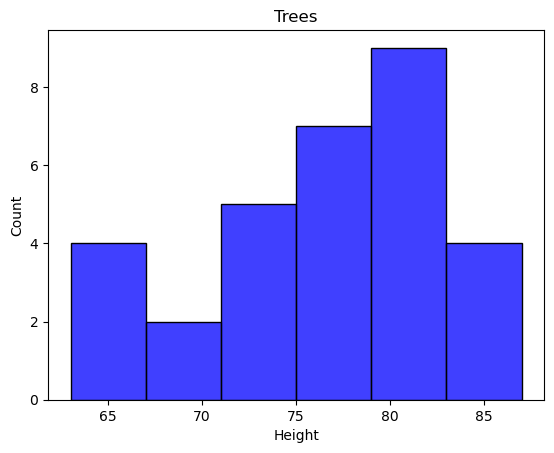

In [8]:
#Visualizing the data in a histogram with seaborn
sns.histplot(dttrees.iloc[:,1], kde=False, bins=6, color='blue').set(title='Trees')

#kde=False does not display the data density line

[Text(0.5, 1.0, 'Trees')]

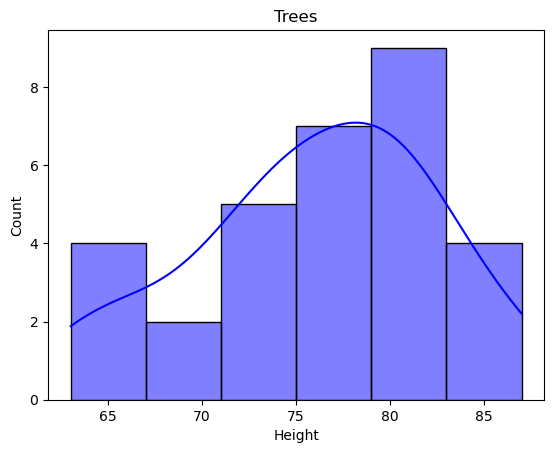

In [9]:
#Visualizing the data in a histogram with a density line with seaborn
sns.histplot(dttrees.iloc[:,1], kde=True, bins=6, color='blue').set(title='Trees')

[Text(0.5, 1.0, 'Trees')]

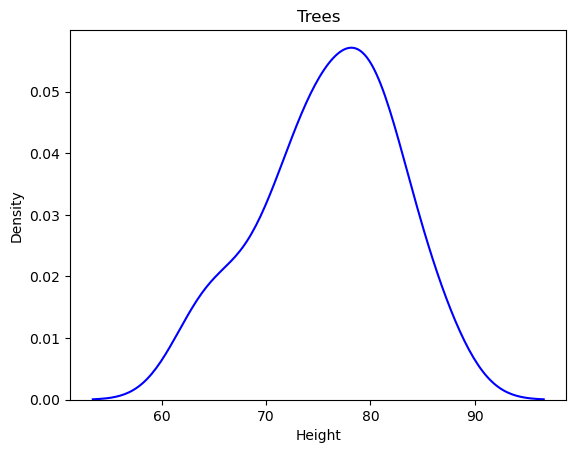

In [10]:
#Visualizing only the density of the data using the kdeplot method
sns.kdeplot(dttrees.iloc[:,1], color='blue').set(title='Trees')

Text(0, 0.5, 'Volume')

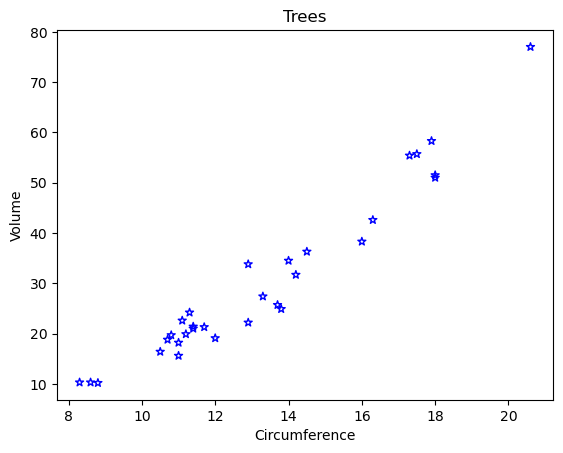

In [11]:
#Using scatter plots to compare two numerical variables

#Example matplotlib
plt.scatter(x=dttrees.Girth, y=dttrees.Volume, color='Blue', facecolors='none', marker='*')
plt.title('Trees')
plt.xlabel('Circumference')
plt.ylabel('Volume')

'''If you specify only the x and y axes without setting a marker, the plot will be drawn as a line.
    Example: plt.scatter(x=dttrees.Girth, y=dttrees.Volume)
'''

<Axes: xlabel='Girth', ylabel='Volume'>

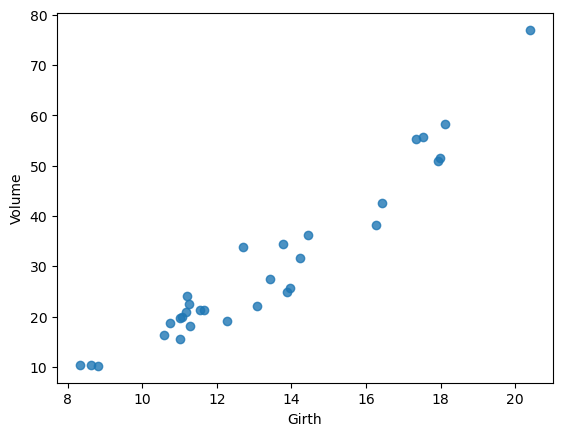

In [12]:
#Example seaborn
sns.regplot(x=dttrees.Girth, y=dttrees.Volume, data=dttrees, x_jitter=0.3, fit_reg=False)

#(x_jitter=0.3) adds a random horizontal displacement to the data points along the x-axis, helping to avoid point overlap and making the data visualization clearer.
#(fit_reg=False) defines whether you want to see the trend line of the data.

(array([ 5., 10.,  4.,  4.,  2.,  0.,  4.,  1.,  0.,  1.]),
 array([10.2 , 16.88, 23.56, 30.24, 36.92, 43.6 , 50.28, 56.96, 63.64,
        70.32, 77.  ]),
 <BarContainer object of 10 artists>)

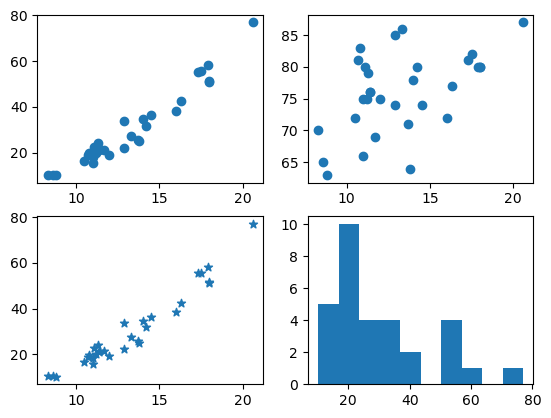

In [19]:
#Grouping multiple plots into a single visualization

#We use (plt.figure()) to create the figure that will contain the plots.
#We use (plt.subplot(row, column, position)) to allocate the plots in the positions of the figure.
plt.figure(1)

#First plot (scatter between girth x volume)
plt.subplot(2,2,1)
plt.scatter(dttrees.Girth, dttrees.Volume)

#Second plot (scatter between girth x height)
plt.subplot(2,2,2)
plt.scatter(dttrees.Girth, dttrees.Height)

#Third plot (scatter plot with marker)
plt.subplot(2,2,3)
plt.scatter(dttrees.Girth, dttrees.Volume, marker='*')

#Fourth plot (histogram)
plt.subplot(2,2,4)
plt.hist(dttrees.Volume)

----
# Dataset: CO₂

In [14]:
dtco2 = pd.read_csv('z_co2.csv')
dtco2.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


In [17]:
#Creating legends in scatter plots

#Storing the columns CONC and UPTAKE in two variables
x = dtco2.conc
y = dtco2.uptake

#Storing the elements of the column TREATMENT in one variable and in a list (which will return only two distinct elements)
t_unique = list(set(dtco2.Treatment))
t_unique


['chilled', 'nonchilled']

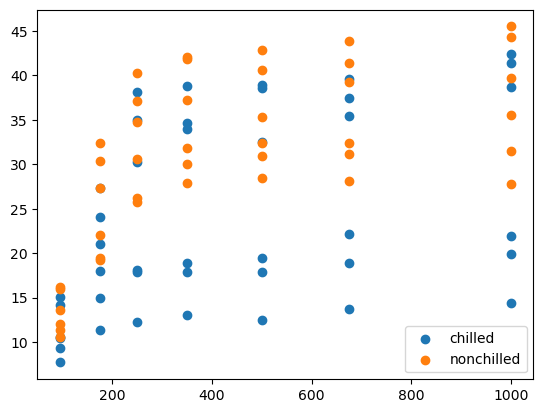

In [18]:
#We iterate through the elements of the column treatment (02 distinct ones) and create the scatter plot.

for i in range(len(t_unique)):
    index = dtco2.Treatment == t_unique[i]
    plt.scatter(x[index],y[index], label= t_unique[i])
plt.legend(loc='lower right')